In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [15]:
# Load the dataset
file_path =  "C:\\Users\\year3\\Downloads\\loan_data_1.csv"  # Replace with the correct path if different
data = pd.read_csv(file_path)

In [22]:
# Drop unnecessary columns if they exist, otherwise ignore this line
data = data.drop(['Loan_ID', 'Unnamed: 0'], axis=1, errors='ignore')

# Handling missing values using SimpleImputer
# We use the most frequent strategy, which is common for handling categorical data
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Encode categorical variables
# Identify columns that need to be encoded
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# Initialize a dictionary to store the label encoders for each column
label_encoders = {}

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    le = LabelEncoder()
    data_imputed[column] = le.fit_transform(data_imputed[column])
    label_encoders[column] = le

# Display the first few rows of the processed data
data_imputed.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1
4,1,1,0,1,0,2333.0,1516.0,95.0,360.0,1.0,2,1


In [23]:
# Define features and target variable
X = data_imputed.drop('Loan_Status', axis=1)
y = data_imputed['Loan_Status']

# Check the shapes of X and y
X.shape, y.shape


((381, 11), (381,))

In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the split data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((266, 11), (115, 11), (266,), (115,))

In [25]:
# Train a logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [26]:
# Make predictions on both training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [27]:
# Evaluate the model using confusion matrix and other metrics for the training set
confusion_train = confusion_matrix(y_train, y_train_pred)
classification_report_train = classification_report(y_train, y_train_pred)
accuracy_train = accuracy_score(y_train, y_train_pred)

# Display the results for the training set
print("Training Set Evaluation:")
print(f"Confusion Matrix:\n{confusion_train}")
print(f"Classification Report:\n{classification_report_train}")
print(f"Accuracy: {accuracy_train:.2f}\n")


Training Set Evaluation:
Confusion Matrix:
[[ 40  35]
 [  2 189]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.53      0.68        75
           1       0.84      0.99      0.91       191

    accuracy                           0.86       266
   macro avg       0.90      0.76      0.80       266
weighted avg       0.87      0.86      0.85       266

Accuracy: 0.86



In [28]:
# Evaluate the model using confusion matrix and other metrics for the testing set
confusion_test = confusion_matrix(y_test, y_test_pred)
classification_report_test = classification_report(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Display the results for the testing set
print("Testing Set Evaluation:")
print(f"Confusion Matrix:\n{confusion_test}")
print(f"Classification Report:\n{classification_report_test}")
print(f"Accuracy: {accuracy_test:.2f}")


Testing Set Evaluation:
Confusion Matrix:
[[14 21]
 [ 1 79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.40      0.56        35
           1       0.79      0.99      0.88        80

    accuracy                           0.81       115
   macro avg       0.86      0.69      0.72       115
weighted avg       0.83      0.81      0.78       115

Accuracy: 0.81


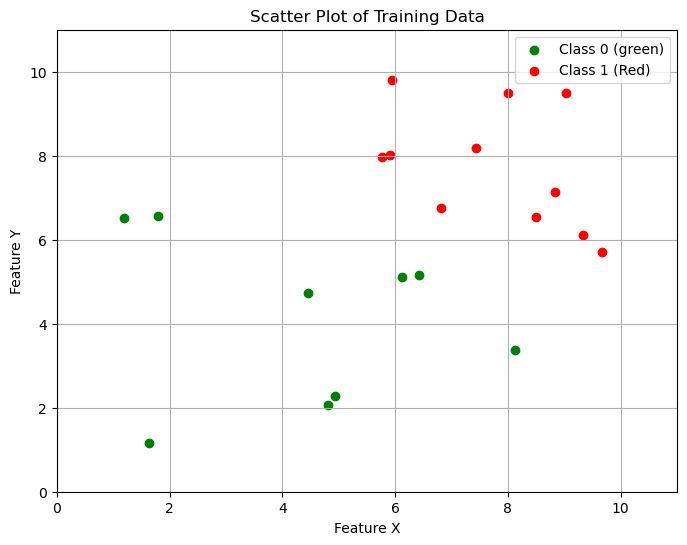

In [32]:
import matplotlib.pyplot as plt

# Generate random data points
np.random.seed(0)  # For reproducibility
X = np.random.uniform(1, 10, 20)
Y = np.random.uniform(1, 10, 20)

# Class assignment based on some condition (for example, based on the sum of X and Y)
classes = np.where(X + Y > 12, 1, 0)  # Class 1 if sum > 12, else Class 0

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[classes == 0], Y[classes == 0], color='green', label='Class 0 (green)')
plt.scatter(X[classes == 1], Y[classes == 1], color='red', label='Class 1 (Red)')
plt.title('Scatter Plot of Training Data')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.legend()
plt.grid()
plt.xlim(0, 11)
plt.ylim(0, 11)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


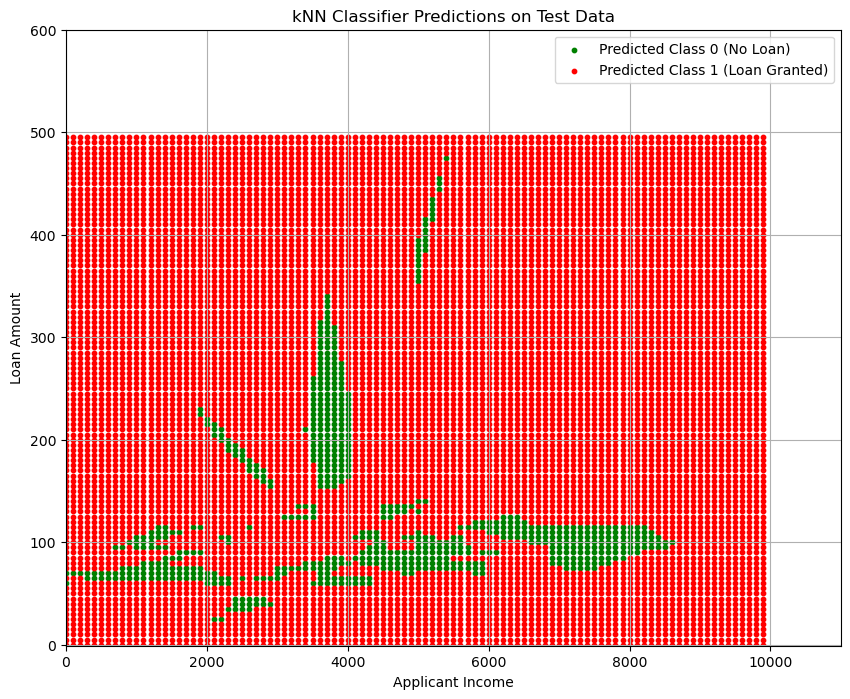

In [41]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


# Select features for classification
# Using 'ApplicantIncome' and 'LoanAmount' as features
X = data[['ApplicantIncome', 'LoanAmount']].dropna()  # Drop rows with NaN values
y = np.where(data['Loan_Status'] == 'Y', 1, 0)  # Convert Loan_Status to binary (1 for 'Y', 0 for 'N')

# Ensure the target variable matches the features
y = y[X.index]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Generate test set data
x_test = np.arange(0, 10000, 100)  # Range for ApplicantIncome
y_test = np.arange(0, 500, 5)       # Range for LoanAmount
X_test, Y_test = np.meshgrid(x_test, y_test)
X_test_flat = X_test.flatten()
Y_test_flat = Y_test.flatten()
test_data = np.column_stack((X_test_flat, Y_test_flat))

# Create and fit kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

# Standardize the test data
test_data_scaled = scaler.transform(test_data)

# Predict classes for test data
predictions = knn.predict(test_data_scaled)

# Create scatter plot of test data
plt.figure(figsize=(10, 8))
plt.scatter(X_test_flat[predictions == 0], Y_test_flat[predictions == 0], color='green', label='Predicted Class 0 (No Loan)', s=10)
plt.scatter(X_test_flat[predictions == 1], Y_test_flat[predictions == 1], color='red', label='Predicted Class 1 (Loan Granted)', s=10)
plt.title('kNN Classifier Predictions on Test Data')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.legend()
plt.grid()
plt.xlim(-1, 11000)
plt.ylim(-1, 600)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


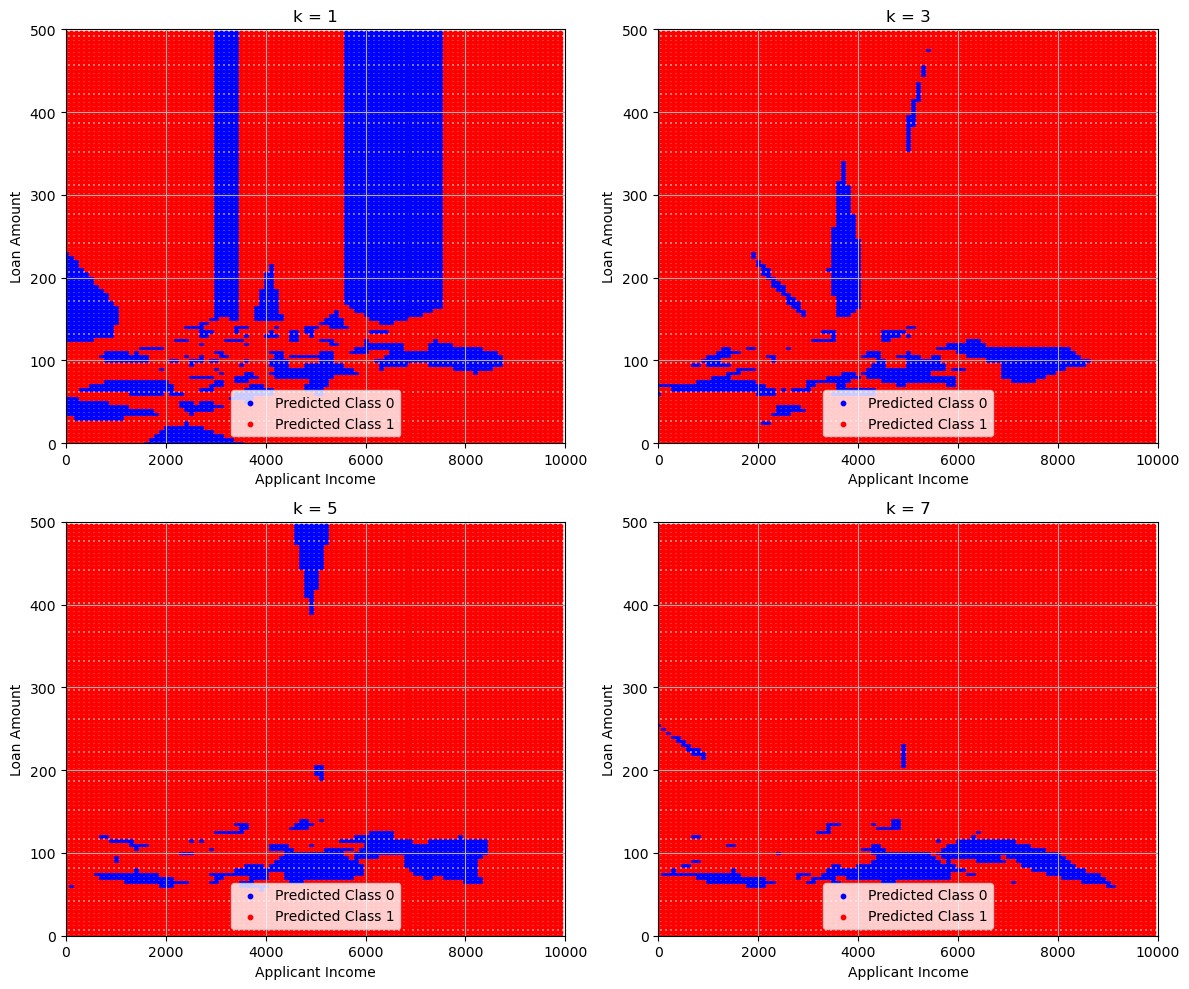

In [38]:
from sklearn.preprocessing import StandardScaler
# Select features for classification

# For this, we will use 'ApplicantIncome' and 'LoanAmount' as features
X = data[['ApplicantIncome', 'LoanAmount']].dropna()  # Drop rows with NaN values
y = np.where(data['Loan_Status'] == 'Y', 1, 0)  # Convert Loan_Status to binary (1 for 'Y', 0 for 'N')

# Ensure the target variable matches the features
y = y[X.index]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Generate test set data
x_test = np.arange(0, 10000, 100)  # Range for ApplicantIncome
y_test = np.arange(0, 500, 5)       # Range for LoanAmount
X_test, Y_test = np.meshgrid(x_test, y_test)
X_test_flat = X_test.flatten()
Y_test_flat = Y_test.flatten()
test_data = np.column_stack((X_test_flat, Y_test_flat))

# Create figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Iterate over different values of k
for i, k in enumerate([1, 3, 5, 7]):
    row = i // 2
    col = i % 2
    
    # Create and fit kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_scaled, y)
    
    # Standardize the test data
    test_data_scaled = scaler.transform(test_data)
    
    # Predict classes for test data
    predictions = knn.predict(test_data_scaled)
    
    # Create scatter plot of test data
    axs[row, col].scatter(X_test_flat[predictions == 0], Y_test_flat[predictions == 0], color='blue', s=10, label='Predicted Class 0')
    axs[row, col].scatter(X_test_flat[predictions == 1], Y_test_flat[predictions == 1], color='red', s=10, label='Predicted Class 1')
    axs[row, col].set_title(f'k = {k}')
    axs[row, col].set_xlabel('Applicant Income')
    axs[row, col].set_ylabel('Loan Amount')
    axs[row, col].set_xlim(0, 10000)
    axs[row, col].set_ylim(0, 500)
    axs[row, col].grid()
    axs[row, col].legend()

plt.tight_layout()
plt.show()